In [12]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from functools import reduce
import operator
from __future__ import print_function

In [13]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


horse ship deer  cat


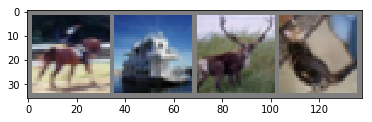

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def show_image(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()
show_image(torchvision.utils.make_grid(images))
print("".join('%5s'%classes[labels[j]] for j in range(4)))

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input image channels, 6 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input image channels, 16 output channels, 5 x 5 square convolution kernel
        self.fc1   = nn.Linear(16*5*5, 120) # an affine operation: y = Wx + b, 120 hidden neurons
        self.fc2   = nn.Linear(120, 84) # affine operation with 84 hidden neurons
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
net

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)

In [21]:
crit = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        opt.zero_grad()
        outputs = net.forward(inputs)
        loss = crit(outputs, labels)
        loss.backward(retain_graph = True)
        opt.step()
        running_loss +=loss.data[0]
        if (i + 1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
    print('Finished Training')


[1,  2000] loss: 1.258
[1,  4000] loss: 1.268
[1,  6000] loss: 1.237
[1,  8000] loss: 1.234
[1, 10000] loss: 1.201
[1, 12000] loss: 1.191
Finished Training
[2,  2000] loss: 1.110
[2,  4000] loss: 1.104
[2,  6000] loss: 1.151
[2,  8000] loss: 1.125
[2, 10000] loss: 1.116
[2, 12000] loss: 1.118
Finished Training
[3,  2000] loss: 1.023
[3,  4000] loss: 1.065
[3,  6000] loss: 1.025
[3,  8000] loss: 1.058
[3, 10000] loss: 1.048
[3, 12000] loss: 1.045
Finished Training
[4,  2000] loss: 0.959
[4,  4000] loss: 0.985
[4,  6000] loss: 0.988
[4,  8000] loss: 0.983
[4, 10000] loss: 0.997
[4, 12000] loss: 1.001
Finished Training
[5,  2000] loss: 0.887
[5,  4000] loss: 0.931
[5,  6000] loss: 0.951
[5,  8000] loss: 0.932
[5, 10000] loss: 0.973
[5, 12000] loss: 0.946
Finished Training
[6,  2000] loss: 0.861
[6,  4000] loss: 0.899
[6,  6000] loss: 0.886
[6,  8000] loss: 0.910
[6, 10000] loss: 0.930
[6, 12000] loss: 0.896
Finished Training
[7,  2000] loss: 0.825
[7,  4000] loss: 0.845
[7,  6000] loss: 0

Ground truth:    cat  ship  ship plane


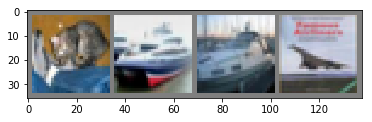

In [22]:
diter = iter(testloader)
images, labels = diter.next()
show_image(torchvision.utils.make_grid(images))
print('Ground truth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))


In [23]:
out = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))


TypeError: 'int' object is not subscriptable

In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))